## **Preface**

⏩ This is third part of ipynb file from my Face Recognition Project using VGG. Please see the first and second part of ipynb file which is "project_1_EDA.ipynb" and "project_1_training vgg model.ipynb". The purpose of this Project are compare VGG16 & VGG19 model architecture to identify male/female from the image files. <br>
This purpose of this file is to give visualization about vgg model that we trained before. <br>
▶ Image files are stored in folder "Dataset/train/" and "Dataset/test/" which are cleaned using "project_1_EDA.ipynb".<br>
▶ Label files are stored in "Dataset/list_train_clean.csv"  and "Dataset/list_test_clean.csv"
▶ Model files are saved in same directory with this file

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.model_selection import train_test_split
import shutil

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score

⏩ If you want use gdrive, mount it first

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd 'gdrive/MyDrive/Colab Notebooks/Face Recognition/'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/Face Recognition


In [ ]:
TRAIN_PATH = 'Dataset/train/'
TEST_PATH = 'Dataset/test/'
IMG_SIZE = (218, 178)
BATCH_SIZE = 32
EPOCH_SIZE = 20

⏩ Load test label dataframe

In [ ]:

df_test = pd.read_csv('Dataset/list_test_clean.csv')
df_test['Male'] = df_test['Male'].astype("string")
df_test.loc[df_test['Male'] == '1', ['Male']] = 'Male'
df_test.loc[df_test['Male'] == '0', ['Male']] = 'Female'
df_test

,Filenames,Male
0,122315.jpg,Male
1,153759.jpg,Male
2,115290.jpg,Male
3,157437.jpg,Female
4,192358.jpg,Female
...,...,...
995,144965.jpg,Female
996,026421.jpg,Male
997,151442.jpg,Female
998,012915.jpg,Female


⏩ Load the vgg16 model with epoch 20

In [ ]:
vgg16_ep20_model = tf.keras.models.load_model("model_finishvgg16_20.h5")
vgg16_ep20_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 5, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 15360)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               3932416   
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 32)               

⏩ Treat test/validation images similar with training

In [ ]:
testing_datagen = ImageDataGenerator(rescale=1./255)
testing_generator = testing_datagen.flow_from_dataframe(
    df_test,
    TEST_PATH,
    x_col='Filenames',
    y_col=None,
    target_size=IMG_SIZE,
    class_mode=None,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 1000 validated image filenames.


⏩ Create function to show confusion matrix and print accuracy

In [ ]:
def show_matrix_confusion(model) :
    # Evaluate the model on the validation set
    evaluation = model.evaluate(testing_generator)

    # Predict model using testing data
    ##true_labels = test_generator.classes
    predictions = model.predict(testing_generator)
    predict = predictions.argmax(axis=1)
    predict_map = ["Male" if v == 1 else "Female" for v in predict]
    #labels = ['Male','Female']
    conf_matrix = confusion_matrix(df_test['Male'], predict_map)
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
    xticklabels=['Predicted Negative', 'Predicted Positive'],
    yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    #Print accuracy, precision, recall & f1
    accuracy = accuracy_score(df_test['Male'] , predict_map)
    precision = precision_score(df_test['Male'] , predict_map, pos_label='Male')
    recall = recall_score(df_test['Male'] , predict_map, pos_label='Male')
    f1 = f1_score(df_test['Male'] , predict_map, pos_label='Male')
    print(f'Accuracy : {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'f1 : {f1}')

⏩ Confusion Matrix VGG16 Epoch 20

32/32 [==============================] - 473s 15s/step


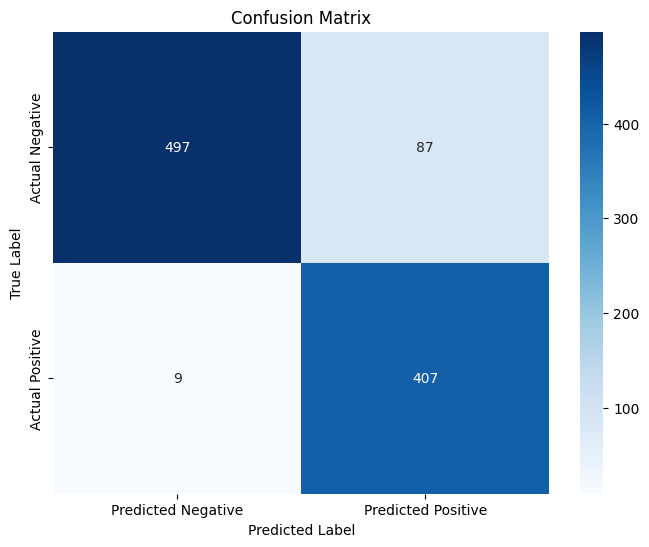

Accuracy : 0.904
Precision : 0.8238866396761133
Recall : 0.9783653846153846
f1 : 0.8945054945054944


In [ ]:
show_matrix_confusion(vgg16_ep20_model)

⏩ Confusion Matrix VGG16 Epoch 30

In [ ]:
vgg16_ep30_model = tf.keras.models.load_model("model_finishvgg16_30.h5")
vgg16_ep30_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 5, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 15360)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               3932416   
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 64)                16448     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 32)               

32/32 [==============================] - 476s 15s/step


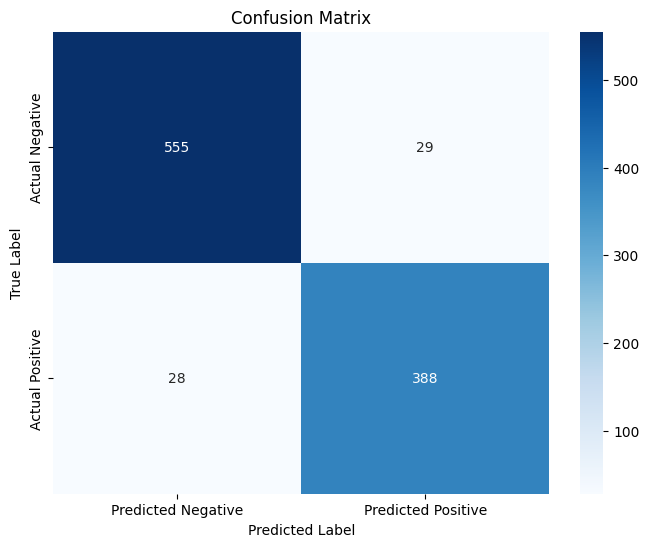

Accuracy : 0.943
Precision : 0.9304556354916067
Recall : 0.9326923076923077
f1 : 0.9315726290516206


In [ ]:
show_matrix_confusion(vgg16_ep30_model)

⏩ Confusion Matrix VGG19 Epoch 20

In [ ]:
vgg19_ep20_model = tf.keras.models.load_model("model_finishvgg19_ep20.h5")
vgg19_ep20_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 6, 5, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 15360)             0         
                                                                 
 dense (Dense)               (None, 256)               3932416   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1

In [ ]:
vgg19_ep20_model.save("model_finishvgg19_ep20.h5")

In [ ]:
vgg19_ep30_model.save("model_finishvgg19_ep30.h5")

32/32 [==============================] - 595s 19s/step


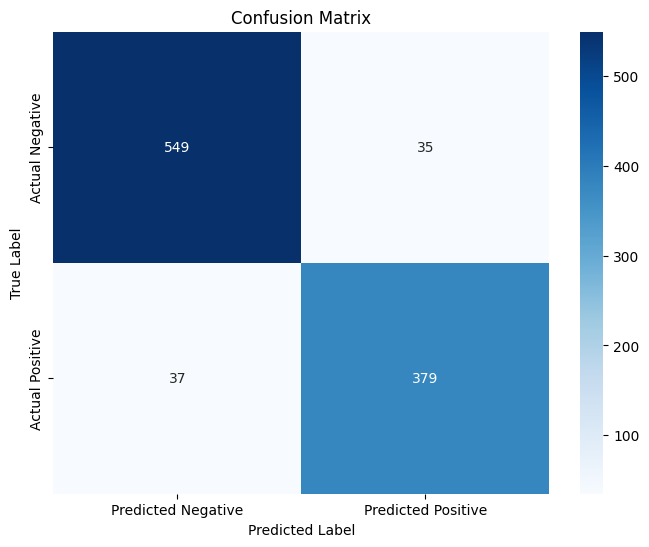

Accuracy : 0.928
Precision : 0.9154589371980676
Recall : 0.9110576923076923
f1 : 0.9132530120481928


In [ ]:
show_matrix_confusion(vgg19_ep20_model)

⏩ Confusion Matrix VGG19 Epoch 30

In [ ]:
vgg19_ep30_model = tf.keras.models.load_model("model_finish2.h5")
vgg19_ep30_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 6, 5, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 15360)             0         
                                                                 
 dense (Dense)               (None, 256)               3932416   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1

32/32 [==============================] - 591s 18s/step


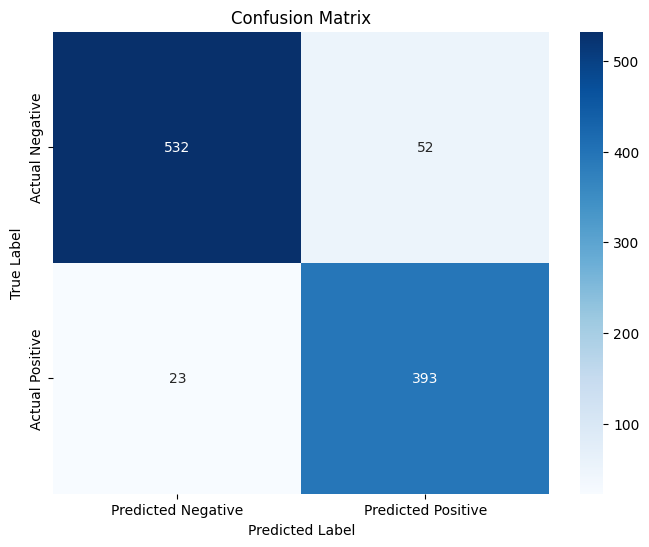

Accuracy : 0.925
Precision : 0.8831460674157303
Recall : 0.9447115384615384
f1 : 0.9128919860627177


In [ ]:
show_matrix_confusion(vgg19_ep30_model)

In [ ]:
accuracy = accuracy_score(df_test['Male'] , predict_map)

In [ ]:
model = vgg16_ep20_model
    # Evaluate the model on the validation set
evaluation = model.evaluate(testing_generator)

# Predict model using testing data
##true_labels = test_generator.classes
predictions = model.predict(testing_generator)
predict = predictions.argmax(axis=1)
predict_map = ["Male" if v == 1 else "Female" for v in predict]
#labels = ['Male','Female']
conf_matrix = confusion_matrix(df_test['Male'], predict_map)


32/32 [==============================] - 477s 15s/step


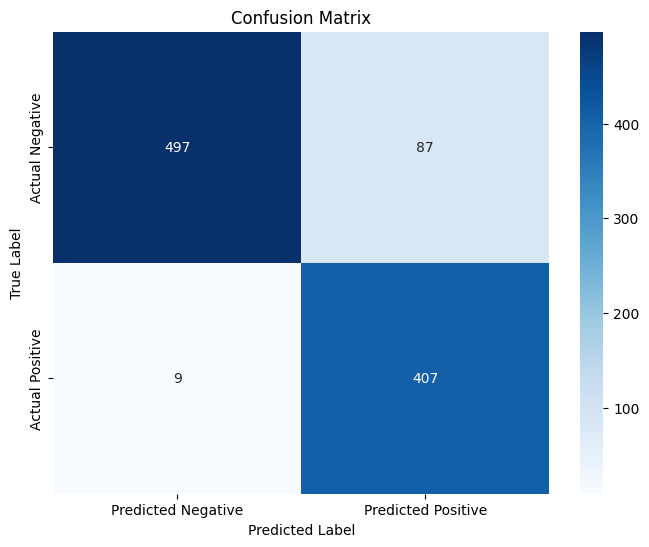

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
xticklabels=['Predicted Negative', 'Predicted Positive'],
yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

